In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
fam_role = pd.read_csv('cleaned_fam_role.csv', index_col='Unnamed: 0')
fam_role.head()

,post_date,job_family,role,count_id_indexed
0,2020-03-01,Healthcare,EXCUDE,1.0000
1,2020-03-01,Customer Service,Call Center Manager,1.0000
2,2020-03-01,Customer Service,Customer Service Manager,1.0000
3,2020-03-01,Customer Service,Customer Service Representative,1.0000
4,2020-03-01,Customer Service,Customer Support Representative,1.0000


In [66]:
fam_role[fam_role['role'].str.lower().str.contains('chief')]['role'].unique()

array(['Chief Accounting Officer', 'Chief Compliance Officer',
       'Chief Information Officer', 'Chief Security Officer',
       'Chief Diversity Officer', 'Chief Marketing Officer',
       'Chief Data Officer', 'Chief Risk Officer',
       'Chief Analytics Officer'], dtype=object)

In [67]:
fam_role[fam_role['role'].str.lower().str.contains('executive')]['role'].unique()

array(['Executive Chef', 'Executive Director', 'Executive Producer',
       'Television Executive', 'Key Account Executive',
       'Executive Compensation Specialist', 'Music Executive',
       'Film Executive'], dtype=object)

In [68]:
fam_role.shape

(619919, 4)

In [69]:
fam_role.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619919 entries, 0 to 619918
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   post_date         619919 non-null  object
 1   job_family        619919 non-null  object
 2   role              619919 non-null  object
 3   count_id_indexed  619919 non-null  object
dtypes: object(4)
memory usage: 23.6+ MB


In [70]:
fam_role = fam_role[(fam_role['count_id_indexed'] != '\\N')]

In [71]:
fam_role['count_id_indexed'] = fam_role['count_id_indexed'].astype(np.float16)

In [72]:
# for role in fam_role['role'].unique():
#     print(role)

In [73]:
# Look into Data Science Roles
# Look into Senior Roles
# Look into Manager Roles

## A look into Data Science roles

In [74]:
dsc_df = fam_role[(fam_role['role'].str.contains('Data')) & (fam_role['job_family'] == 'IT')].copy()
dsc_df.head()

,post_date,job_family,role,count_id_indexed
685,2020-03-01,IT,Data Administrator,1.0
686,2020-03-01,IT,Data Analyst,1.0
687,2020-03-01,IT,Data Architect,1.0
688,2020-03-01,IT,Data Center Manager,1.0
689,2020-03-01,IT,Data Consultant,1.0


In [75]:
dsc_df['post_date'] = pd.to_datetime(dsc_df['post_date']).dt.date

In [76]:
def get_97th_percentile(x):
    return np.percentile(x, 97)

In [77]:
dsc_df.groupby('role').mean()

,count_id_indexed
role,
Data Administrator,0.765625
Data Analyst,0.952148
Data Architect,2.445312
Data Center Manager,15.617188
Data Consultant,3.953125
Data Engineer,0.317383
Data Entry Operator,1.219727
Data Scientist,0.741699
Data Specialist,1.296875


In [78]:
roles_by_date = dsc_df.groupby(['post_date', 'role']).mean().reset_index()

In [79]:
# 2020 dates
roles_in_2020 = roles_by_date[roles_by_date['post_date'] < pd.to_datetime('2021-01-01')]

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [80]:
# 2021 dates
roles_in_2021 = roles_by_date[roles_by_date['post_date'] > pd.to_datetime('2021-01-01')]

In [81]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

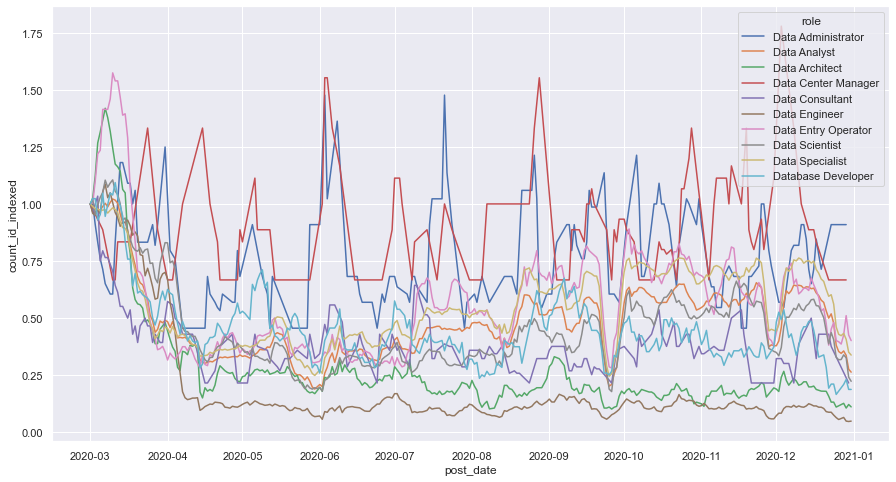

In [82]:
sns.lineplot(data=roles_in_2020, x='post_date', y='count_id_indexed', hue='role')

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


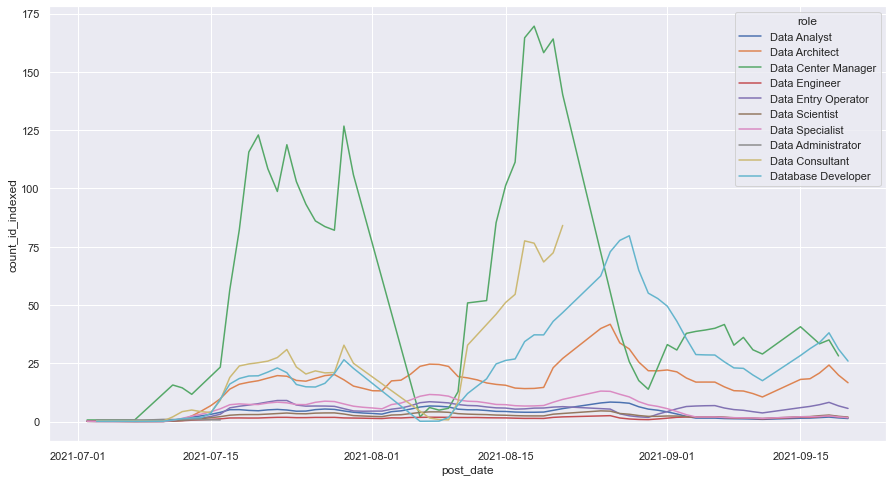

In [83]:
sns.lineplot(data=roles_in_2021[roles_in_2021['post_date'] > pd.to_datetime('2021-07')], x='post_date', y='count_id_indexed', hue='role')
plt.show()

On multiple occasions the, Data Center Managers have a huge increase in jobs relative to before COVID. This could be a data entry error or it could be legitament. It's not simply one entry that is extremely high, but a period of extremely high postings. According to my research, there are a lot of openings that need to be filled for Data Center Management. This increase could also be due to the large amount of COVID time data that needed to be managed.

In [84]:
roles_in_2021[roles_in_2021['count_id_indexed'] > 75]

,post_date,role,count_id_indexed
4041,2021-07-18,Data Center Manager,82.2500
4050,2021-07-19,Data Center Manager,115.6250
4059,2021-07-20,Data Center Manager,122.9375
4068,2021-07-21,Data Center Manager,108.4375
4077,2021-07-22,Data Center Manager,98.6875
4086,2021-07-23,Data Center Manager,118.7500
4095,2021-07-24,Data Center Manager,102.9375
4104,2021-07-25,Data Center Manager,93.2500
4113,2021-07-26,Data Center Manager,86.0625
4122,2021-07-27,Data Center Manager,83.6250


## Remove all extremely high values

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


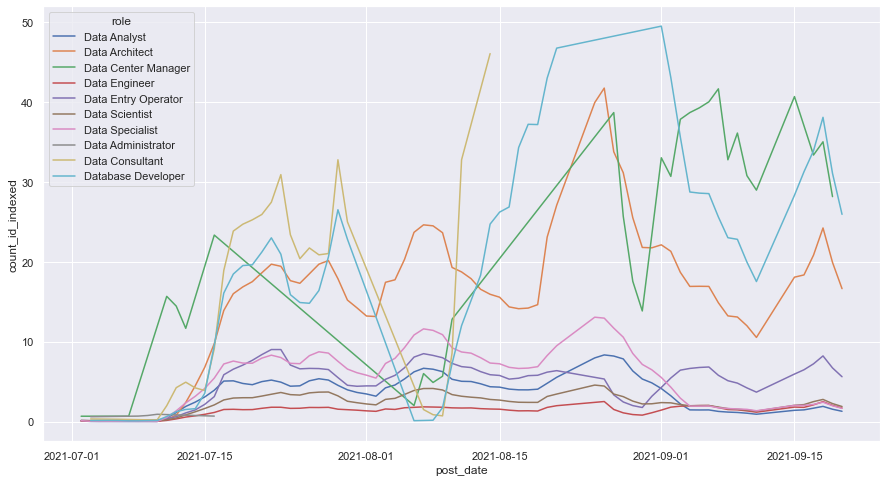

In [85]:
sns.lineplot(data=roles_in_2021[(roles_in_2021['post_date'] > pd.to_datetime('2021-07')) & (roles_in_2021['count_id_indexed'] < 50)], x='post_date', y='count_id_indexed', hue='role')
plt.show()

## A look into Manager roles

In [86]:
managers_df = fam_role[fam_role['role'].str.lower().str.contains('manager')]
managers_df.head()

,post_date,job_family,role,count_id_indexed
1,2020-03-01,Customer Service,Call Center Manager,1.0
2,2020-03-01,Customer Service,Customer Service Manager,1.0
5,2020-03-01,Customer Service,Relationship Manager,1.0
7,2020-03-01,Customer Service,Service Desk Manager,1.0
8,2020-03-01,Customer Service,Service Manager,1.0


There are a lot of Manger roles that aren't in the same industry, so let's split them before we compare job postings.
Different manager roles will probably come up more often than others (i.e. Food Service Managers than a Accounting Manager)

In [87]:
managers_df['role'].nunique()

142

In [88]:
managers_df['role'].unique()[:20]

array(['Call Center Manager', 'Customer Service Manager',
       'Relationship Manager', 'Service Desk Manager', 'Service Manager',
       'Box Office Manager', 'Event Manager/Planner',
       'Membership Manager', 'Park Manager', 'Promotions Manager',
       'Stage Manager', 'Studio Manager', 'Technical Manager',
       'Community Manager', 'Construction Manager', 'Facilities Manager',
       'Maintenance Manager', 'Property Manager', 'Accounting Manager',
       'Apartment Manager'], dtype=object)

In [89]:
managers_df['post_date'] = pd.to_datetime(managers_df['post_date']).dt.date

/var/folders/mv/m9p7xj3x64ddcm_shh2yq5p00000gn/T/ipykernel_54752/1521443055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  managers_df['post_date'] = pd.to_datetime(managers_df['post_date']).dt.date


In [90]:
# 2020 dates
managers_2020 = managers_df[managers_df['post_date'] < pd.to_datetime('2021-01-01')]

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [91]:
# 2021 dates
managers_2021 = managers_df[managers_df['post_date'] >= pd.to_datetime('2021-01-01')]

In [92]:
# Aggregate count_id_index for mean per job family
managers_2020_grouped = managers_2020.groupby(['job_family', 'post_date']).mean()
managers_2020_grouped.head()

count_id_indexed
job_family       post_date                   
Customer Service 2020-03-01          1.000000
                 2020-03-02          0.985352
                 2020-03-03          1.013672
                 2020-03-04          1.037109
                 2020-03-05          1.041992

In [93]:
# Aggregate count_id_index for mean per job family
managers_2021_grouped = managers_2021.groupby(['job_family', 'post_date']).mean()
managers_2021_grouped = managers_2021_grouped.reset_index()
managers_2021_grouped.head()

,job_family,post_date,count_id_indexed
0,Customer Service,2021-01-01,0.423828
1,Customer Service,2021-01-02,0.433105
2,Customer Service,2021-01-03,0.436279
3,Customer Service,2021-01-04,0.416992
4,Customer Service,2021-01-05,0.485840


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

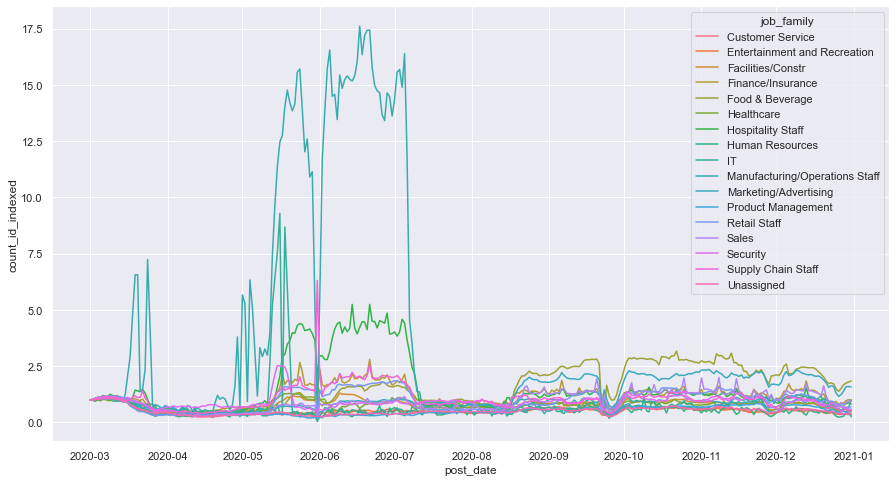

In [94]:
sns.lineplot(data=managers_2020_grouped, x='post_date', y='count_id_indexed', hue='job_family')

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

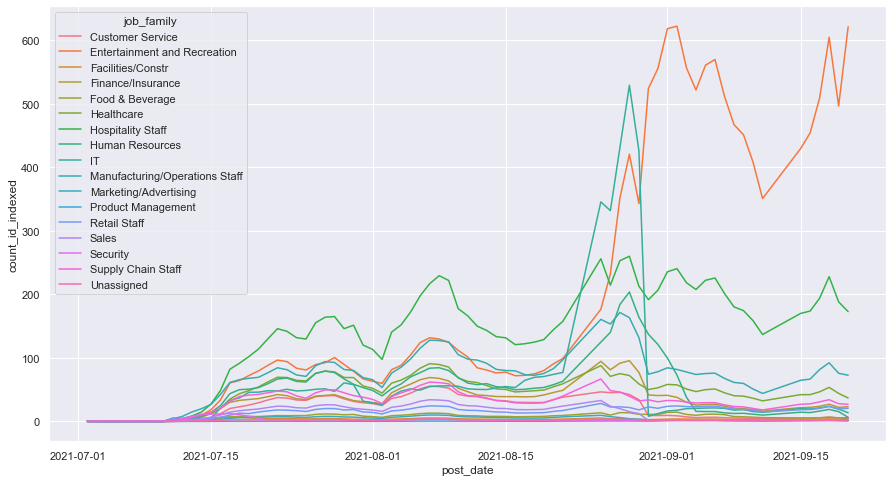

In [95]:
sns.lineplot(data=managers_2021_grouped[(managers_2021_grouped['post_date'] > pd.to_datetime('2021-07'))], x='post_date', y='count_id_indexed', hue='job_family')

#### Filming for hollywood won't start until september 2021
https://www.projectcasting.com/blog/news/when-filming-will-start/

### Healthcare also makes sense because covid cases increased around that time as well
https://www.projectcasting.com/blog/news/when-filming-will-start/

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

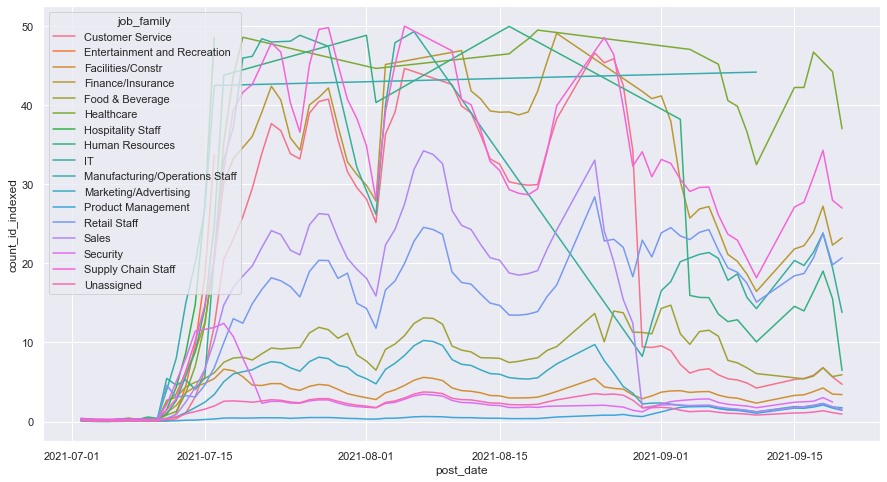

In [63]:
sns.lineplot(data=managers_2021_grouped[(managers_2021_grouped['post_date'] > pd.to_datetime('2021-07')) & (managers_2021_grouped['count_id_indexed'] < 50)], x='post_date', y='count_id_indexed', hue='job_family')